In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
BATCH_SIZE = 64
IMAGE_SIZE = (256, 256) 

In [40]:
pip install --upgrade tensorflow

Note: you may need to restart the kernel to use updated packages.


In [4]:
import os  
import numpy as np  
from PIL import Image  
import tensorflow as tf  

def load_image_data(directory, image_size, batch_size):  
    images = []  
    labels = []  
    
    class_names = os.listdir(directory)  
    
    for class_index, class_name in enumerate(class_names):  
        class_dir = os.path.join(directory, class_name)  
        
        if os.path.isdir(class_dir):  
            for img_file in os.listdir(class_dir):  
                img_path = os.path.join(class_dir, img_file)  
                
                try:  
                    img = Image.open(img_path).resize(image_size)  
                    img_array = np.array(img) / 255.0  # Normalize to [0, 1]  
                    images.append(img_array)  
                    labels.append(class_index)  
                except Exception as e:  
                    print(f"Error loading image {img_path}: {e}")  
    
    images = np.array(images)  
    labels = np.array(labels)   
    
    dataset = tf.data.Dataset.from_tensor_slices((images, labels))  
    dataset = dataset.shuffle(len(images)).batch(batch_size)  
    
    return dataset  

# Parameters  
BATCH_SIZE = 32  
IMAGE_SIZE = (128, 128)  # Width, Height  
directory = "D:/Major project/Dataset/archive/Dataset"  

# Load dataset  
dataset = load_image_data(directory, IMAGE_SIZE, BATCH_SIZE)

In [5]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory="D:/Major project/Dataset/archive/Dataset",
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE
)


Found 6400 files belonging to 4 classes.


In [7]:

classes  = dataset.class_names
classes


['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']

In [8]:

# Get the dataset metadata
metadata = dataset.element_spec
print(metadata)

# Extract the class names from the metadata
classes = dataset.class_names

(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))


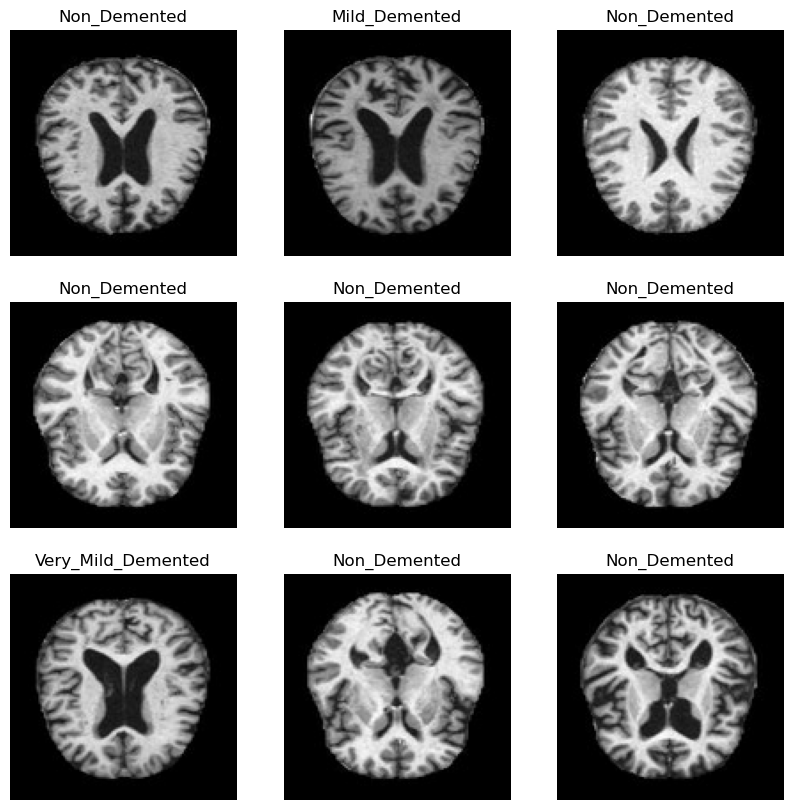

In [11]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for images,labels in dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(classes[labels[i]])
        plt.axis("off")

In [16]:
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Load and preprocess the dataset
datagen = ImageDataGenerator(rescale=1./255)
data_generator = datagen.flow_from_directory(
    'D:/Major project/Dataset/archive/Dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=True)

# Split the data into training and testing sets
data, labels = next(data_generator)
for _ in range(len(data_generator) - 1):
    imgs, lbls = next(data_generator)
    data = np.append(data, imgs, axis=0)
    labels = np.append(labels, lbls, axis=0)

train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

# Load the pre-trained CNN model (VGG16 in this case)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model = Model(inputs=base_model.input, outputs=base_model.output)

# Extract features
train_features = model.predict(train_data)
test_features = model.predict(test_data)

# Flatten the features
train_features_flat = train_features.reshape((train_features.shape[0], -1))
test_features_flat = test_features.reshape((test_features.shape[0], -1))

# Train the SVM
svm = SVC(kernel='linear')
svm.fit(train_features_flat, train_labels)

# Predict on the test set
test_predictions = svm.predict(test_features_flat)

# Evaluate the performance
svm_accu=accuracy_score(test_labels, test_predictions)
print("Accuracy:", svm_accu)
svm_class=classification_report(test_labels, test_predictions)
print(svm_class)

Found 6400 images belonging to 4 classes.
160/160 ━━━━━━━━━━━━━━━━━━━━ 1534s 10s/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 365s 9s/step
Accuracy: 0.96171875
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96       194
         1.0       1.00      1.00      1.00        14
         2.0       0.96      0.97      0.97       642
         3.0       0.96      0.94      0.95       430

    accuracy                           0.96      1280
   macro avg       0.97      0.97      0.97      1280
weighted avg       0.96      0.96      0.96      1280



In [17]:
import joblib
joblib.dump(svm, 'svm_model.pkl')

['svm_model.pkl']

In [18]:
import joblib

try:
    svm = joblib.load('svm_model.pkl')
    print("Model loaded successfully.")
except Exception as e:
    print("Error loading model:", e)


Model loaded successfully.


Unexpected image shape: (224, 224, 3)
Unexpected image shape: (224, 224, 3)
Unexpected image shape: (224, 224, 3)
Unexpected image shape: (224, 224, 3)
Unexpected image shape: (224, 224, 3)
Unexpected image shape: (224, 224, 3)
Unexpected image shape: (224, 224, 3)
Unexpected image shape: (224, 224, 3)
Unexpected image shape: (224, 224, 3)
Unexpected image shape: (224, 224, 3)
Unexpected image shape: (224, 224, 3)
Unexpected image shape: (224, 224, 3)


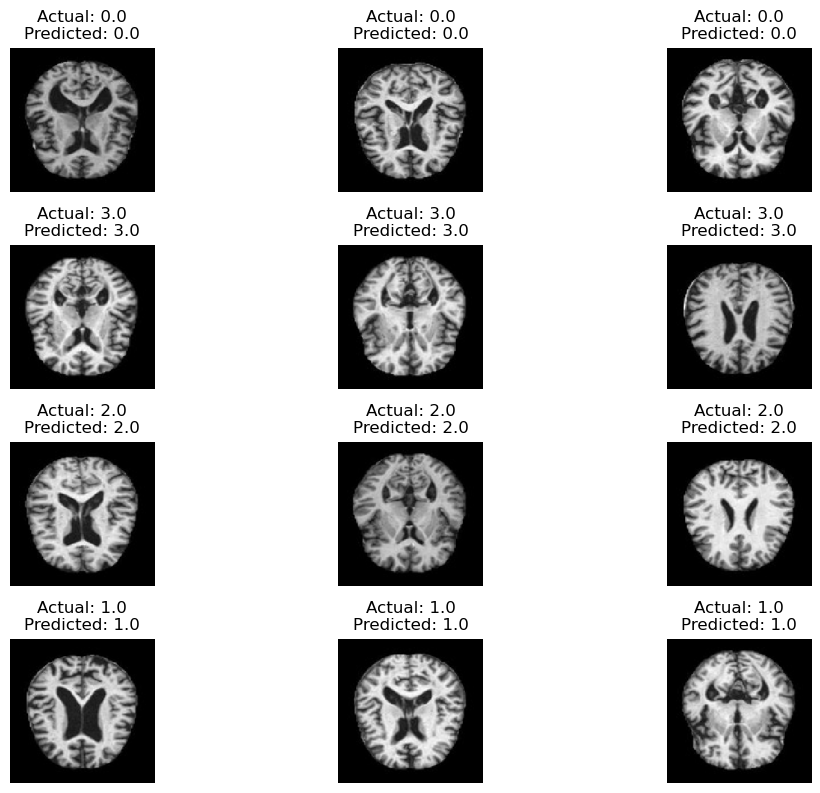

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have predicted_labels, actual_labels, and test_images available

# Group indices of the test images by their actual labels
class_indices = {}
for idx, label in enumerate(test_labels):
    if label not in class_indices:
        class_indices[label] = []
    class_indices[label].append(idx)

# Display a representative image from each class
num_classes_to_display = 5  # Number of classes to display
images_per_class = 3  # Number of images per class to display

plt.figure(figsize=(10, 10))  # Adjusted figure size for better visibility
class_labels = list(class_indices.keys())[:num_classes_to_display]  # Get the class labels to display

for class_index, class_label in enumerate(class_labels):
    indices = class_indices[class_label][:images_per_class]  # Get indices for the current class
    for i, idx in enumerate(indices):
        image = test_data[idx]
        
        # Check the shape and reshape accordingly
        if image.size == 128 * 128:  # Grayscale
            image = image.reshape(128, 128)
        elif image.size == 128 * 128 * 3:  # RGB
            image = image.reshape(128, 128, 3)
        else:
            print(f"Unexpected image shape: {image.shape}")

        plt.subplot(num_classes_to_display, images_per_class, class_index * images_per_class + i + 1)
        plt.imshow(image, cmap='gray' if image.ndim == 2 else None)
        plt.title(f"Actual: {test_labels[idx]}\nPredicted: {test_predictions[idx]}")
        plt.axis('off')

plt.tight_layout()
plt.show()


In [20]:
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Load and preprocess the dataset
datagen = ImageDataGenerator(rescale=1./255)
data_generator = datagen.flow_from_directory(
    'D:/Major project/Dataset/archive/Dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=True)

# Split the data into training and testing sets
data, labels = next(data_generator)
for _ in range(len(data_generator) - 1):
    imgs, lbls = next(data_generator)
    data = np.append(data, imgs, axis=0)
    labels = np.append(labels, lbls, axis=0)

train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

# Load the pre-trained CNN model (VGG16 in this case)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model = Model(inputs=base_model.input, outputs=base_model.output)

# Extract features
train_features = model.predict(train_data)
test_features = model.predict(test_data)

# Flatten the features
train_features_flat = train_features.reshape((train_features.shape[0], -1))
test_features_flat = test_features.reshape((test_features.shape[0], -1))

# Train the SVM
rf=RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(train_features_flat, train_labels)

# Predict on the test set
test_predictions = rf.predict(test_features_flat)
rf_accu=accuracy_score(test_labels, test_predictions)
# Evaluate the performance
print("Accuracy:", rf_accu)
rf_class=classification_report(test_labels, test_predictions)
print(rf_class)

Found 6400 images belonging to 4 classes.
160/160 ━━━━━━━━━━━━━━━━━━━━ 1691s 11s/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 512s 13s/step
Accuracy: 0.83828125
              precision    recall  f1-score   support

         0.0       1.00      0.43      0.60       186
         1.0       1.00      0.09      0.17        11
         2.0       0.84      0.98      0.90       652
         3.0       0.81      0.83      0.82       431

    accuracy                           0.84      1280
   macro avg       0.91      0.58      0.62      1280
weighted avg       0.85      0.84      0.82      1280



Unexpected image shape: (224, 224, 3)
Unexpected image shape: (224, 224, 3)
Unexpected image shape: (224, 224, 3)
Unexpected image shape: (224, 224, 3)
Unexpected image shape: (224, 224, 3)
Unexpected image shape: (224, 224, 3)
Unexpected image shape: (224, 224, 3)
Unexpected image shape: (224, 224, 3)
Unexpected image shape: (224, 224, 3)
Unexpected image shape: (224, 224, 3)
Unexpected image shape: (224, 224, 3)
Unexpected image shape: (224, 224, 3)


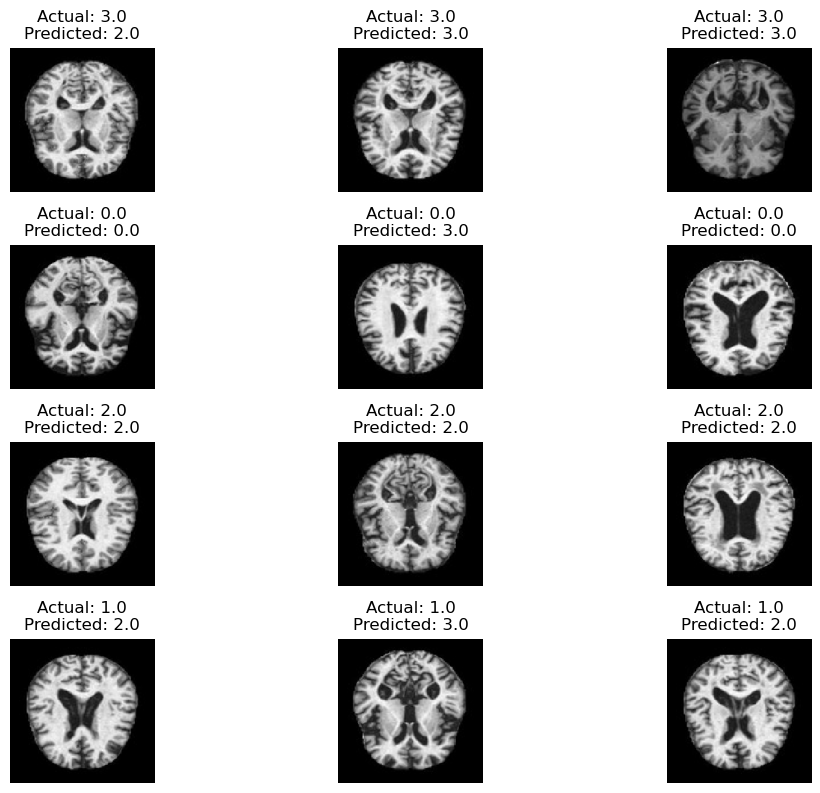

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have predicted_labels, actual_labels, and test_images available

# Group indices of the test images by their actual labels
class_indices = {}
for idx, label in enumerate(test_labels):
    if label not in class_indices:
        class_indices[label] = []
    class_indices[label].append(idx)

# Display a representative image from each class
num_classes_to_display = 5  # Number of classes to display
images_per_class = 3  # Number of images per class to display

plt.figure(figsize=(10, 10))  # Adjusted figure size for better visibility
class_labels = list(class_indices.keys())[:num_classes_to_display]  # Get the class labels to display

for class_index, class_label in enumerate(class_labels):
    indices = class_indices[class_label][:images_per_class]  # Get indices for the current class
    for i, idx in enumerate(indices):
        image = test_data[idx]
        
        # Check the shape and reshape accordingly
        if image.size == 128 * 128:  # Grayscale
            image = image.reshape(128, 128)
        elif image.size == 128 * 128 * 3:  # RGB
            image = image.reshape(128, 128, 3)
        else:
            print(f"Unexpected image shape: {image.shape}")

        plt.subplot(num_classes_to_display, images_per_class, class_index * images_per_class + i + 1)
        plt.imshow(image, cmap='gray' if image.ndim == 2 else None)
        plt.title(f"Actual: {test_labels[idx]}\nPredicted: {test_predictions[idx]}")
        plt.axis('off')

plt.tight_layout()
plt.show()


In [22]:
import joblib
joblib.dump(rf, 'rf_model.pkl')

['rf_model.pkl']

In [23]:
import dill
with open('rf_model_new.pkl', 'wb') as f:
    dill.dump(rf, f)

In [36]:
import os

# Save the model
with open('rf_model_new.pkl', 'wb') as f:
    dill.dump(rf, f)

# Check the file size
file_size = os.path.getsize('rf_model_new.pkl')
print(f"File size: {file_size} bytes")


File size: 10254457 bytes


In [24]:
import joblib

try:
    rf = joblib.load('rf_model.pkl')
    print("Model loaded successfully.")
except Exception as e:
    print("Error loading model:", e)


Model loaded successfully.


In [25]:
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Load and preprocess the dataset
datagen = ImageDataGenerator(rescale=1./255)
data_generator = datagen.flow_from_directory(
    'D:/Major project/Dataset/archive/Dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=True)

# Split the data into training and testing sets
data, labels = next(data_generator)
for _ in range(len(data_generator) - 1):
    imgs, lbls = next(data_generator)
    data = np.append(data, imgs, axis=0)
    labels = np.append(labels, lbls, axis=0)

train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

# Debugging: Check shapes
print("Train data shape:", train_data.shape)
print("Train labels shape:", train_labels.shape)
print("Test data shape:", test_data.shape)
print("Test labels shape:", test_labels.shape)

# Load the pre-trained CNN model (VGG16 in this case)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model = Model(inputs=base_model.input, outputs=base_model.output)

# Extract features
train_features = model.predict(train_data)
test_features = model.predict(test_data)

# Flatten the features
train_features_flat = train_features.reshape((train_features.shape[0], -1))
test_features_flat = test_features.reshape((test_features.shape[0], -1))
  
# Debugging: Check feature shapes
print("Train features shape:", train_features_flat.shape)
print("Test features shape:", test_features_flat.shape)

# Train the Gradient Boosting Classifier
# gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
# gb.fit(train_features_flat, train_labels)

# # Predict on the test set
# test_predictions = gb.predict(test_features_flat)

# # Debugging: Check predictions
# print("Test predictions:", test_predictions)

# # Evaluate the performance
# print(classification_report(test_labels, test_predictions))
 

Found 6400 images belonging to 4 classes.
Train data shape: (5120, 224, 224, 3)
Train labels shape: (5120,)
Test data shape: (1280, 224, 224, 3)
Test labels shape: (1280,)
160/160 ━━━━━━━━━━━━━━━━━━━━ 1725s 11s/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 367s 9s/step
Train features shape: (5120, 25088)
Test features shape: (1280, 25088)


In [37]:
gb = GradientBoostingClassifier(n_estimators=10, random_state=42)
gb.fit(train_features_flat[:5000], train_labels[:5000])

GradientBoostingClassifier(n_estimators=10, random_state=42)

In [38]:
test_predictions = gb.predict(test_features_flat)
gb_accu=accuracy_score(test_labels, test_predictions)
print("Accuracy: ",gb_accu)
gb_class=classification_report(test_labels, test_predictions)
print(gb_class)

Accuracy:  0.6265625
              precision    recall  f1-score   support

         0.0       0.94      0.08      0.15       179
         1.0       0.40      0.29      0.33        14
         2.0       0.63      0.88      0.73       623
         3.0       0.62      0.51      0.56       464

    accuracy                           0.63      1280
   macro avg       0.65      0.44      0.44      1280
weighted avg       0.66      0.63      0.58      1280



Unexpected image shape: (224, 224, 3)
Unexpected image shape: (224, 224, 3)
Unexpected image shape: (224, 224, 3)
Unexpected image shape: (224, 224, 3)
Unexpected image shape: (224, 224, 3)
Unexpected image shape: (224, 224, 3)
Unexpected image shape: (224, 224, 3)
Unexpected image shape: (224, 224, 3)
Unexpected image shape: (224, 224, 3)
Unexpected image shape: (224, 224, 3)
Unexpected image shape: (224, 224, 3)
Unexpected image shape: (224, 224, 3)


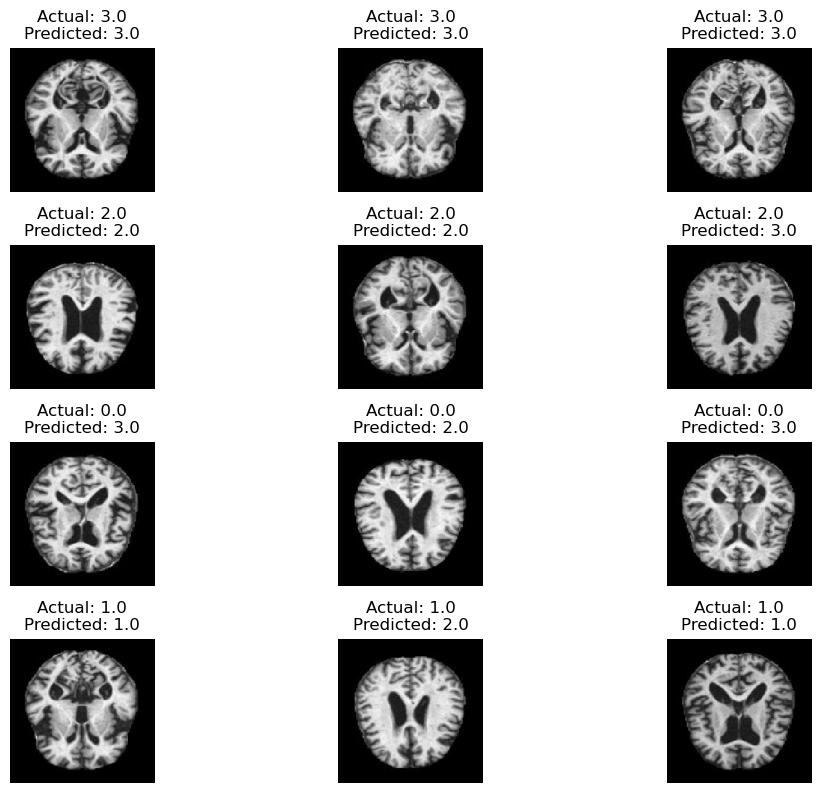

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have predicted_labels, actual_labels, and test_images available

# Group indices of the test images by their actual labels
class_indices = {}
for idx, label in enumerate(test_labels):
    if label not in class_indices:
        class_indices[label] = []
    class_indices[label].append(idx)

# Display a representative image from each class
num_classes_to_display = 5  # Number of classes to display
images_per_class = 3  # Number of images per class to display

plt.figure(figsize=(10, 10))  # Adjusted figure size for better visibility
class_labels = list(class_indices.keys())[:num_classes_to_display]  # Get the class labels to display

for class_index, class_label in enumerate(class_labels):
    indices = class_indices[class_label][:images_per_class]  # Get indices for the current class
    for i, idx in enumerate(indices):
        image = test_data[idx]
        
        # Check the shape and reshape accordingly
        if image.size == 128 * 128:  # Grayscale
            image = image.reshape(128, 128)
        elif image.size == 128 * 128 * 3:  # RGB
            image = image.reshape(128, 128, 3)
        else:
            print(f"Unexpected image shape: {image.shape}")

        plt.subplot(num_classes_to_display, images_per_class, class_index * images_per_class + i + 1)
        plt.imshow(image, cmap='gray' if image.ndim == 2 else None)
        plt.title(f"Actual: {test_labels[idx]}\nPredicted: {test_predictions[idx]}")
        plt.axis('off')

plt.tight_layout()
plt.show()


In [40]:
import joblib
joblib.dump(gb, 'gb_model.pkl')

['gb_model.pkl']

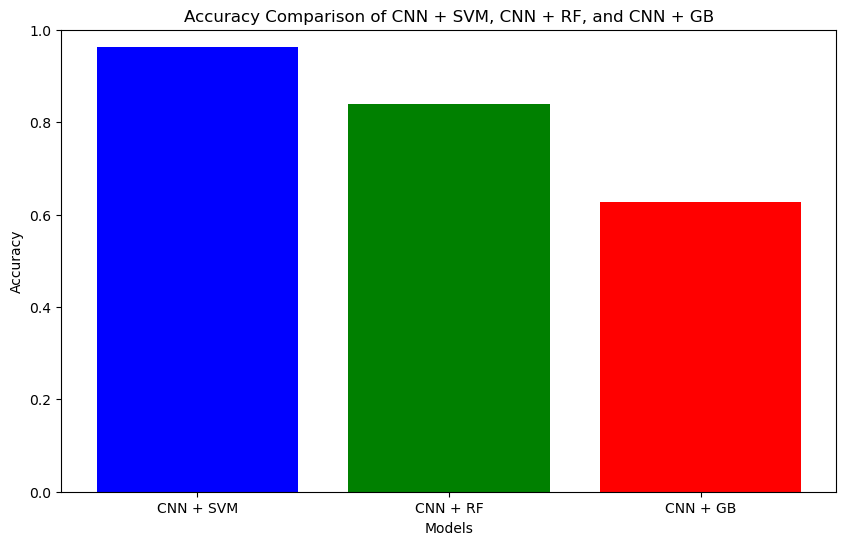

In [41]:
# Plot the accuracy comparison
models = ['CNN + SVM', 'CNN + RF', 'CNN + GB']
accuracies = [svm_accu, rf_accu, gb_accu]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of CNN + SVM, CNN + RF, and CNN + GB')
plt.ylim([0, 1])
plt.show()